In [261]:
import cv2 as ocv
import os

In [262]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'Classifiers and accuracy.ipynb',
 'data',
 'Hello, ML.ipynb',
 'Image Classifier.ipynb',
 'Image Vision with OpenCV.ipynb',
 'images',
 'Iris',
 'Iris ML.ipynb',
 'Iris Test ML.ipynb',
 'iris-decision-tree-visualization--(Iris.pdf).PNG',
 'Iris.pdf',
 'opencv-machine-learning-master.zip',
 'README.md']

In [263]:
fox = ocv.imread('images/fox.jpg')
ocv.imwrite('images/fox.png', fox)

True

In [264]:
fox = ocv.imread('images/fox.jpg', ocv.IMREAD_UNCHANGED)
ocv.imwrite('images/fox-.png', fox)

True

In [265]:
print(ocv.__doc__)

Python wrapper for OpenCV.


In [266]:
import matplotlib.pyplot as plt

In [267]:
from sklearn import datasets

In [268]:
X, y = datasets.make_classification(n_samples=100, n_classes=2, n_redundant=0, n_features=2, random_state=7816)

In [269]:
%matplotlib inline

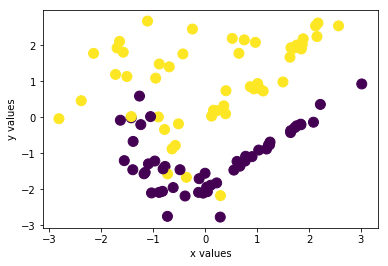

In [270]:
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.xlabel('x values')
plt.ylabel('y values')

In [271]:
import numpy as np
import sklearn.model_selection

X = X.astype(np.float32)
y = y*2 - 1

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=.2, random_state=42)

In [272]:
print(X_train, y_train)

[[-0.61702013 -1.9507395 ]
 [ 1.64507484 -0.42228991]
 [ 1.76400936 -0.23332804]
 [ 1.24868345 -0.68655598]
 [ 1.63341594  1.67385817]
 [ 1.21837044 -0.76691687]
 [ 0.16054986  0.19849268]
 [-0.12785649 -2.08403921]
 [ 0.12317213  0.0359357 ]
 [-0.97091949 -1.21352816]
 [-0.11676288 -1.70371902]
 [ 0.0280838  -1.9391911 ]
 [-0.81110406 -1.43104017]
 [ 0.22020994 -1.82224548]
 [ 2.17262435  2.62397766]
 [ 0.66845876 -1.35596573]
 [-1.24064624 -0.20070334]
 [ 1.64714384 -0.36924782]
 [ 1.24067998 -0.76143456]
 [ 0.61339664 -1.22420228]
 [-1.0935117  -1.29214168]
 [ 0.10722372 -1.88518071]
 [-1.4251138   0.02189843]
 [ 1.84411681 -0.20444912]
 [-1.11126006  2.67746186]
 [-0.78300637 -0.33697492]
 [-0.72720808 -2.75131321]
 [ 1.18163192 -0.87925291]
 [-0.48523769 -1.45480609]
 [ 0.29403061 -2.17490077]
 [ 1.88749146  2.1838789 ]
 [-1.57948482  1.8115468 ]
 [ 2.15315175  2.24719715]
 [ 0.76921976 -1.21394444]
 [-0.95387596  1.09136093]
 [ 2.21872211  0.36066234]
 [ 1.65138936  1.93640041]
 

In [273]:
svm = ocv.ml.SVM_create()

In [274]:
svm.setKernel(ocv.ml.SVM_LINEAR)

In [275]:
svm.train(X_train, ocv.ml.ROW_SAMPLE, y_train)

True

In [276]:
_, y_predict = svm.predict(X_test)

In [277]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_predict)
print("Accuracy {}".format(acc))

Accuracy 0.8


In [278]:
def plot_decision_boundary(svm, X_test, y_test):
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    h = 0.02  # step size in mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_hypo = np.c_[xx.ravel().astype(np.float32), yy.ravel().astype(np.float32)]
    X_hypo = np.c_[xx.ravel().astype(np.float32), yy.ravel().astype(np.float32)]
    _, zz = svm.predict(X_hypo)
    _, zz = svm.predict(X_hypo)
    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)

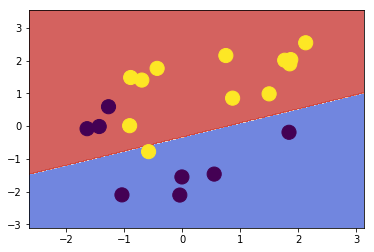

In [279]:
plot_decision_boundary(svm, X_test, y_test)

In [280]:
# Trying out different Kernels

kernels = [ocv.ml.SVM_LINEAR, ocv.ml.SVM_C, ocv.ml.SVM_INTER, 
           ocv.ml.SVM_SIGMOID, ocv.ml.SVM_RBF]


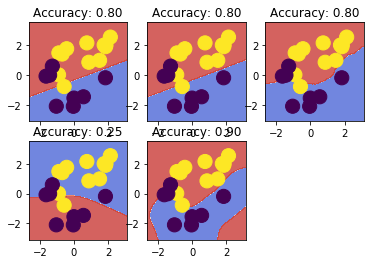

In [281]:
for idx, kernel in enumerate(kernels):
    svm = ocv.ml.SVM_create()
    svm.setKernel(kernel)
    svm.train(X_train, ocv.ml.ROW_SAMPLE, y_train)
    _, test_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, test_pred)
    plt.subplot(2, 3, idx + 1)
    plot_decision_boundary(svm, X_test, y_test)
    plt.title('Accuracy: %.2f' % acc)

# Detecting Pedestrians in the wild

In [282]:
def extract_tar(filename):
    datadir = 'data'
    datafile = '%s/%s.tar.gz' % (datadir, filename)
    extractdir = '%s' % (datadir)

    try:
        import tarfile
    except ImportError:
        print("Failed to import module 'tarfile'. \
              Please try extracting out of python")
    tar = tarfile.open(datafile)
    tar.extractall(path=extractdir)
    tar.close()
    print('Successfully extracted %s to %s' % (datafile, extractdir))

In [283]:
datadir = 'data'
dataset = 'pedestrians128x64'
extract_tar(dataset)

Successfully extracted data/pedestrians128x64.tar.gz to data


In [284]:
import os
os.listdir('data/pedestrians128x64/')

['per00001.ppm',
 'per00002.ppm',
 'per00003.ppm',
 'per00004.ppm',
 'per00005.ppm',
 'per00006.ppm',
 'per00007.ppm',
 'per00008.ppm',
 'per00009.ppm',
 'per00010.ppm',
 'per00011.ppm',
 'per00012.ppm',
 'per00013.ppm',
 'per00014.ppm',
 'per00015.ppm',
 'per00016.ppm',
 'per00017.ppm',
 'per00018.ppm',
 'per00019.ppm',
 'per00020.ppm',
 'per00021.ppm',
 'per00022.ppm',
 'per00023.ppm',
 'per00024.ppm',
 'per00025.ppm',
 'per00026.ppm',
 'per00027.ppm',
 'per00028.ppm',
 'per00029.ppm',
 'per00030.ppm',
 'per00031.ppm',
 'per00032.ppm',
 'per00033.ppm',
 'per00034.ppm',
 'per00035.ppm',
 'per00036.ppm',
 'per00037.ppm',
 'per00038.ppm',
 'per00039.ppm',
 'per00040.ppm',
 'per00041.ppm',
 'per00042.ppm',
 'per00043.ppm',
 'per00044.ppm',
 'per00045.ppm',
 'per00046.ppm',
 'per00047.ppm',
 'per00048.ppm',
 'per00049.ppm',
 'per00050.ppm',
 'per00051.ppm',
 'per00052.ppm',
 'per00053.ppm',
 'per00054.ppm',
 'per00055.ppm',
 'per00056.ppm',
 'per00057.ppm',
 'per00058.ppm',
 'per00059.ppm

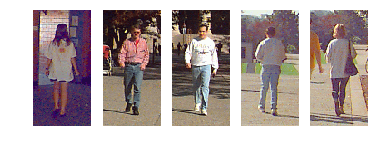

In [285]:
for i in range(5):
    filename = '%s/%s/per0010%d.ppm' % (datadir, dataset, i)
    image = ocv.imread(filename)
    plt.subplot(1, 5, i + 1)
    plt.imshow(ocv.cvtColor(image, ocv.COLOR_BGR2RGB))
    plt.axis('off')

# Histogram of Orientation Gradients

In [286]:
win_size = (48, 96) # **** most important argument
block_size = (16, 16)
block_stride = (8, 8)
cell_size = (8, 8)
num_bins = 9
hog = ocv.HOGDescriptor(win_size, block_size, block_stride, cell_size, num_bins)


In [287]:
import random
random.seed(42)
X_pos = []
for i in random.sample(range(1, 900), 400):
    filename = "%s/%s/per%s%d.ppm" % (datadir, dataset, ('0'*(5-len(str(i)))) , i)
    img = ocv.imread(filename)
    X_pos.append(hog.compute(img, (64, 64)))

##### We should also remember that OpenCV wants the feature matrix to contain 32-bit floating point numbers, and the target labels to be 32-bit integers. We don't mind, since converting to NumPy arrays will allow us to easily investigate the sizes of the matrices we created:

In [288]:
X_pos = np.array(X_pos, dtype=np.float32)
y_pos = np.ones(X_pos.shape[0], dtype=np.int32)

In [289]:
X_pos.shape, y_pos.shape

((400, 1980, 1), (400,))

In [290]:
negdir = '%s' % ('pedestrians_neg')
extract_tar(negdir)

Successfully extracted data/pedestrians_neg.tar.gz to data


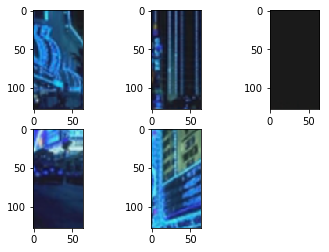

In [291]:
hroi = 128
wroi = 64
X_neg = []

for file in os.listdir('%s/%s' % (datadir, negdir)):
    filename = '%s/%s/%s' % (datadir, negdir, file)
    image = ocv.imread(filename)
    image = ocv.resize(image, (512, 512))
    # cut out a 64 x 128 pixel ROI by randomly 
    # choosing the top-left corner coordinate
    # This is used to grow the dataset of negatives.
    
    ## This var checks that only the first looped images are displayed 
    display = True 
    for j in range(5):
        rand_y = random.randint(0, image.shape[0] - hroi)
        rand_x = random.randint(0, image.shape[1] - wroi)
        roi = image[rand_y:rand_y + hroi, rand_x:rand_x + wroi, :]
        X_neg.append(hog.compute(roi, (64, 64)))
        # For displaying of resized images
        if display:
            plt.subplot(2, 3, j + 1)
            plt.imshow(roi)
    display = False
    

In [292]:
X_neg = np.array(X_neg, dtype=np.float32)
y_neg = -np.ones(X_neg.shape[0], dtype=np.int32)

In [293]:
y_neg

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [294]:
X_neg.shape, y_neg.shape

((250, 1980, 1), (250,))

## concatenate all positive (X_pos) and negative samples (X_neg) into a single dataset X

In [295]:
X = np.concatenate((X_pos, X_neg))
y = np.concatenate((y_pos, y_neg))

### Split train and test sets

In [296]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=.2, random_state=42)

In [297]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((520, 1980, 1), (520,), (130, 1980, 1), (130,))

In [298]:
def train_svm(X_train, y_train):
    svm = ocv.ml.SVM_create()
    svm.train(X_train, ocv.ml.ROW_SAMPLE, y_train)
    return svm

In [299]:
def score_svm(svm, X_test, y_test):
    from sklearn.metrics import accuracy_score
    _, test_predict = svm.predict(X_test)
    score = accuracy_score(y_test, test_predict)
    return score

In [300]:
svm = train_svm(X_train, y_train)

In [301]:
## Score our training data
score_svm(svm, X_train, y_train) # 1.0 implies no mistake with training set

1.0

In [302]:
score_svm(svm, X_test, y_test)

0.66153846153846152

# <center> Bootstrapping the model </center>

### <center>Finding false positives, and add to training set<center>
##### <center>False positives are test points whose target value is False, but are evaluated as True during testing.</center>

In [303]:
# def model_bootstrap():
train_score = []
test_score = []
for j in range(3):
    svm = train_svm(X_train, y_train)
    train_score.append(score_svm(svm, X_train, y_train))
    test_score.append(score_svm(svm, X_test, y_test))
    _, pred_test = svm.predict(X_test)
    false_pos = np.logical_and(
    (pred_test.ravel() == 1), (y_test.ravel() == -1))
    if not np.any(false_pos):
        print("No more false positives: done")
        break
    # Append false positive(s) to training set
    X_train = np.concatenate((X_train, X_test[false_pos, :]), axis=0)
    y_train = np.concatenate((y_train, y_test[false_pos]), axis=0)

train_score

No more false positives: done


[1.0, 1.0]

In [304]:
train_score, test_score

([1.0, 1.0], [0.66153846153846152, 1.0])

In [305]:
print(y_test.ravel.__doc__)

a.ravel([order])

    Return a flattened array.

    Refer to `numpy.ravel` for full documentation.

    See Also
    --------
    numpy.ravel : equivalent function

    ndarray.flat : a flat iterator on the array.


# <center>Detecting Pedestrians in a larger image</center>

In [335]:
img_test = ocv.imread('data/pedestrian_TEST.jpg')
stride = 16
found = []
for ystart in np.arange(0, img_test.shape[0], stride):
    for xstart in np.arange(0, img_test.shape[1], stride):
        if ystart + hroi > img_test.shape[0]:
            continue
        if xstart + wroi > img_test.shape[1]:
            continue
        roi = img_test[ystart:ystart + hroi, xstart:xstart + wroi, :]
        feat = np.array([hog.compute(roi, (64, 64))])
        _, ypred = svm.predict(feat)
        if np.allclose(ypred, 1):
            found.append((ystart, xstart, hroi, wroi))
hog = ocv.HOGDescriptor(win_size, block_size, block_stride, cell_size, num_bins)
rho, _, _ = svm.getDecisionFunction(0)
sv = svm.getSupportVectors()
hog.setSVMDetector(np.append(sv[0, :].ravel(), rho))
found, _ = hog.detectMultiScale(img_test)

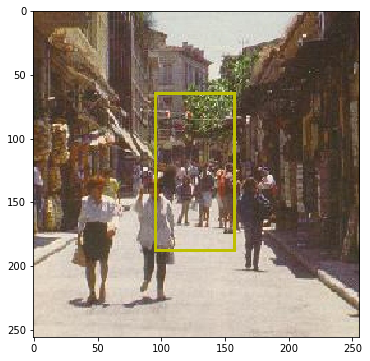

In [336]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.imshow(ocv.cvtColor(img_test, ocv.COLOR_BGR2RGB))
from matplotlib import patches
for f in found:
    ax.add_patch(patches.Rectangle((f[0], f[1]), f[2], f[3], color='y', linewidth=3, fill=False))
plt.savefig('data/detected.png')